# Info
Name:  

    ORACLES_AOD_HSRL_allyears

Purpose:  

    Prepare an analysis for comparing AOD of the HSRL from all ORACLES years
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - HSRL HDF5 files with the 355 and 532 AOD above clouds
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2019-05-11
    

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot
import hdf5storage as hs
from plotting_utils import prelim
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import load_utils as lu

In [3]:
import scipy.stats as st
from mpl_toolkits.basemap import Basemap

In [4]:
%matplotlib notebook

In [5]:
fp =getpath('ORACLES')#'C:/Userds/sleblan2/Research/ORACLES/'
fp

Return path named:  ORACLES /mnt/c/Users/lebla/Research/ORACLES/


u'/mnt/c/Users/lebla/Research/ORACLES/'

# Load files

## Load the 2016 data

In [10]:
fp6 = fp+'data_other/HSRL/'

In [7]:
f6_hsrl = os.listdir(fp6)

In [8]:
s6 = {}
for i,f in enumerate(f6_hsrl):
    print 'Reading file: '+fp6+f
    hf = hs.h5py.File(fp6+f,'r+')
    h = {}
    h[u'lat'] = hf['ER2_IMU']['Latitude'].value
    h[u'lon'] = hf['ER2_IMU']['Longitude'].value
    h[u'alt'] = hf['ER2_IMU']['gps_alt'].value
    h[u'time'] = hf['ER2_IMU']['gps_time'].value
    h[u'header'] = hf['000_Readme'].value
    h[u'acaod_355'] = hf['DataProducts']['355_AOT_above_cloud'].value
    h[u'acaod_532'] = hf['DataProducts']['532_AOT_above_cloud'].value
    h[u'acaod_355_unc'] = hf['DataUncertainty']['355_AOT_above_cloud_unc'].value
    h[u'acaod_532_unc'] = hf['DataUncertainty']['532_AOT_above_cloud_unc'].value
    h[u'cloud_top_height'] = hf['DataProducts']['cloud_top_height'].value
    h[u'date'] = hf['header']['date'].value[0][0]
    h[u'filename'] = f
    s6[u's{:08.0f}'.format(h['date'])] = h

Reading file: /mnt/c/Users/lebla/Research/ORACLES/data_other/HSRL/ORACLES_2016_HSRL_ACAOD.mat


KeyError: "Unable to open object (object 'ER2_IMU' doesn't exist)"

In [9]:
len(s6)

0

In [14]:
s6.keys()

[u's20160916',
 u's20160922',
 u's20160826',
 u's20160920',
 u's20160823',
 u's20160912',
 u's20160924',
 u's20160819',
 u's20160918']

In [15]:
s6['s20160819'].keys()

[u'acaod_355',
 u'acaod_355_unc',
 u'lon',
 u'cloud_top_height',
 u'header',
 u'date',
 u'time',
 u'lat',
 u'alt',
 u'filename',
 u'acaod_532',
 u'acaod_532_unc']

### Plot the results

<IPython.core.display.Javascript object>


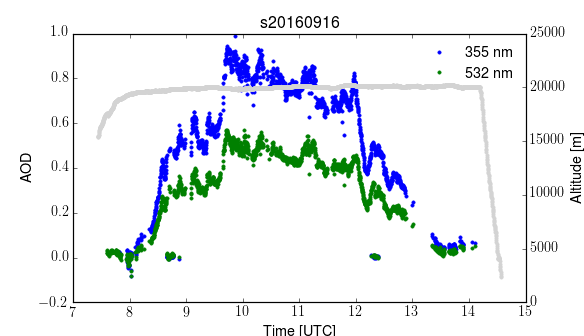

<IPython.core.display.Javascript object>


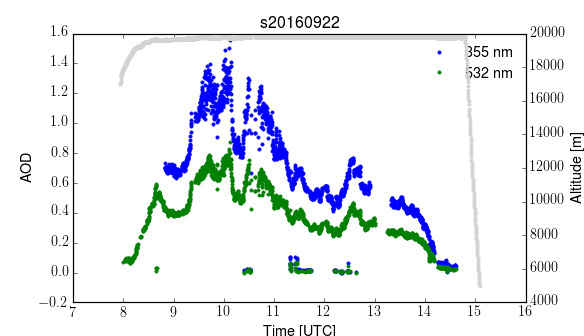

<IPython.core.display.Javascript object>


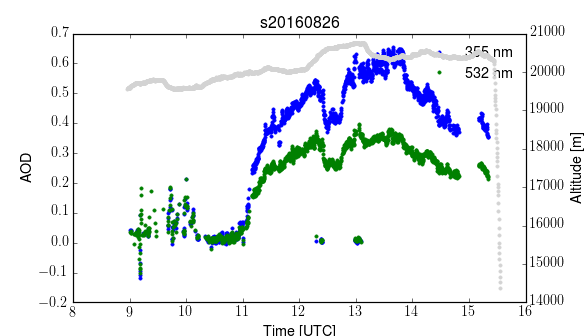

<IPython.core.display.Javascript object>


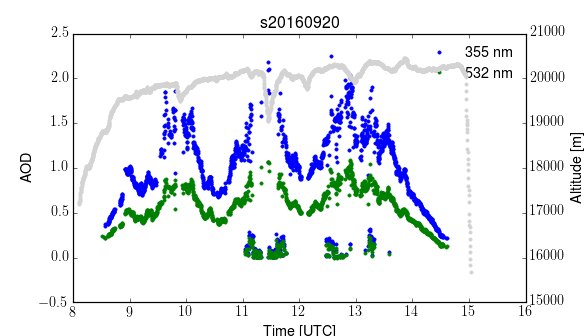

<IPython.core.display.Javascript object>


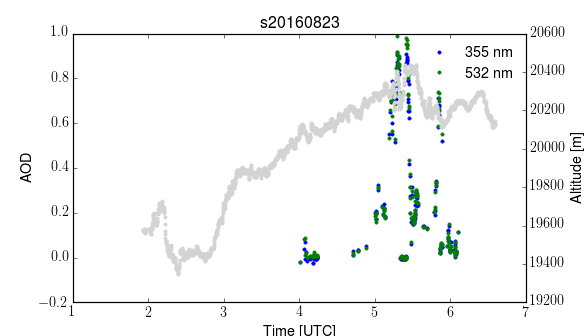

<IPython.core.display.Javascript object>


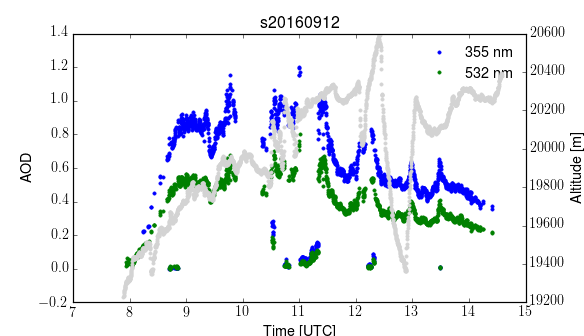

<IPython.core.display.Javascript object>


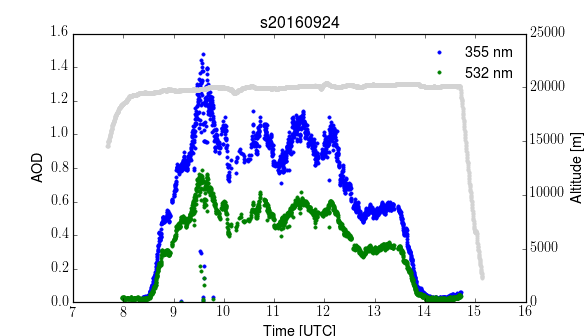

<IPython.core.display.Javascript object>


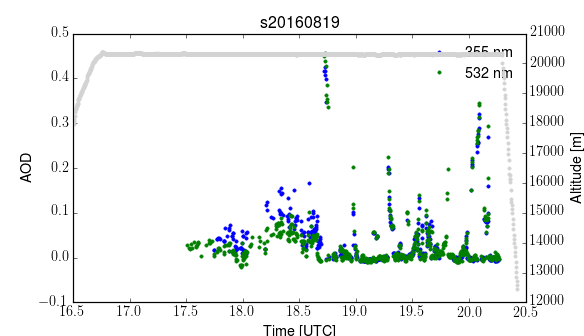

<IPython.core.display.Javascript object>


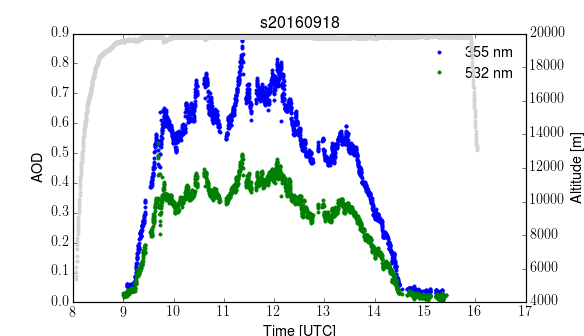

In [278]:
for sk in s6.keys():
    plt.figure()
    plt.plot(s6[sk]['time'],s6[sk]['acaod_355'],'b.',label='355 nm')
    plt.plot(s6[sk]['time'],s6[sk]['acaod_532'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s6[sk]['time'],s6[sk]['alt'],'.',color='lightgrey')
    axy.set_ylabel('Altitude [m]')

<IPython.core.display.Javascript object>


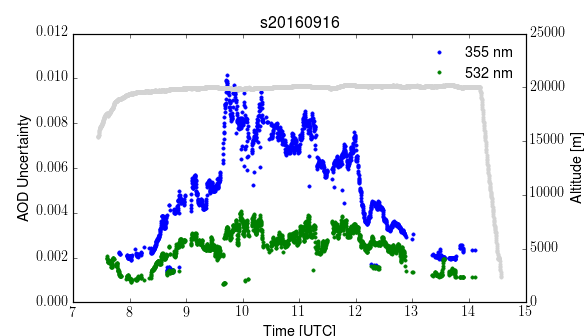

<IPython.core.display.Javascript object>


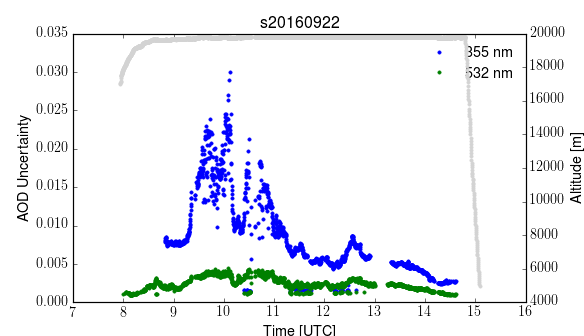

<IPython.core.display.Javascript object>


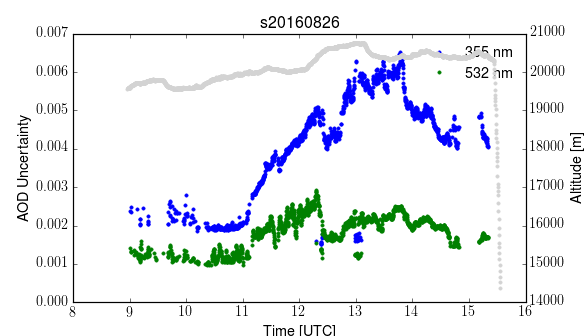

<IPython.core.display.Javascript object>


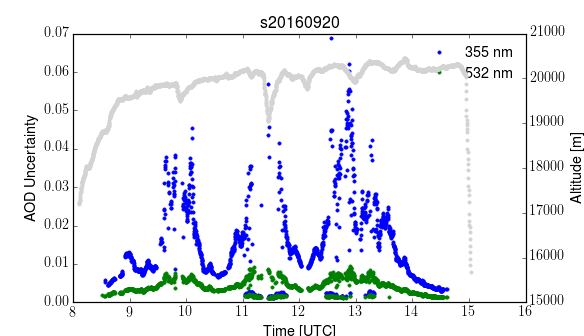

<IPython.core.display.Javascript object>


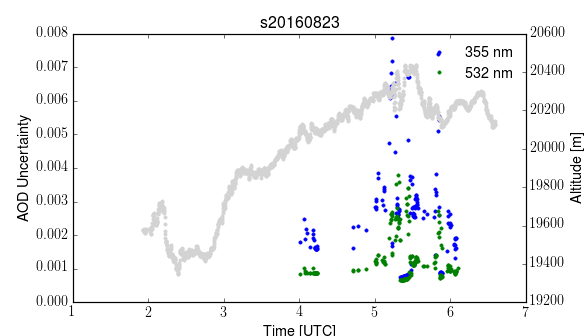

<IPython.core.display.Javascript object>


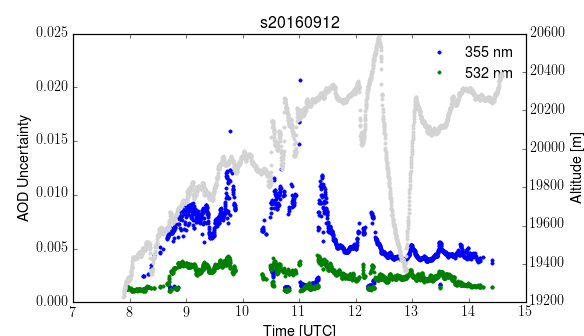

<IPython.core.display.Javascript object>


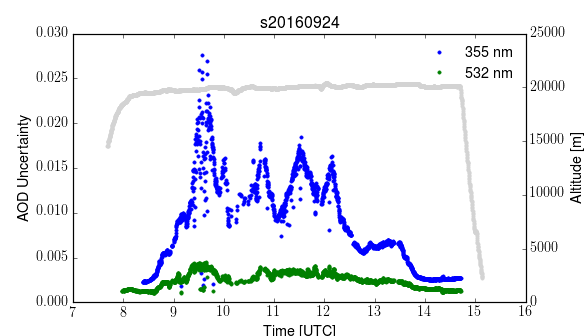

<IPython.core.display.Javascript object>


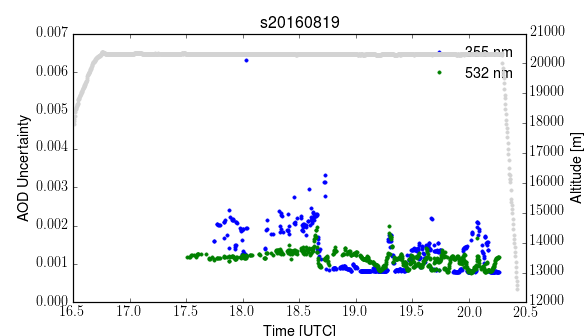

<IPython.core.display.Javascript object>


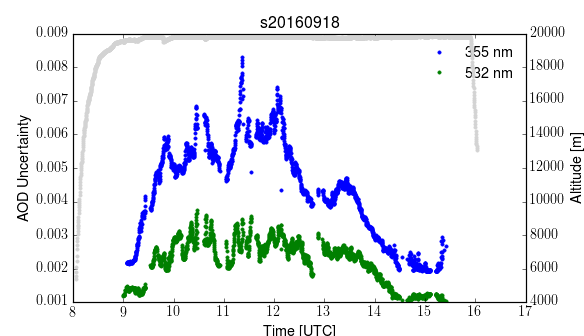

In [204]:
for sk in s6.keys():
    plt.figure()
    plt.plot(s6[sk]['time'],s6[sk]['acaod_355_unc'],'b.',label='355 nm')
    plt.plot(s6[sk]['time'],s6[sk]['acaod_532_unc'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD Uncertainty')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s6[sk]['time'],s6[sk]['alt'],'.',color='lightgrey')
    axy.set_ylabel('Altitude [m]')

<IPython.core.display.Javascript object>


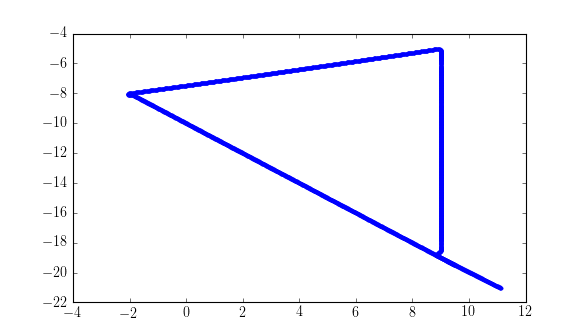

In [123]:
plt.figure()
plt.plot(s[3]['lon'],s[3]['lat'],'.')

### Save to a file

In [16]:
hs.savemat(fp6+'ORACLES_2016_HSRL_ACAOD.mat',s6)

## Load the 2017 data

In [15]:
fp7 = fp+'data_other_2017/HSRL/'

In [18]:
f7_hsrl = os.listdir(fp7)

In [19]:
f7_hsrl

[u'HSRL2_P3_20170809_R1.h5',
 u'HSRL2_P3_20170812_R1.h5',
 u'HSRL2_P3_20170813_R1.h5',
 u'HSRL2_P3_20170815_R1.h5',
 u'HSRL2_P3_20170817_R1.h5',
 u'HSRL2_P3_20170818_R1.h5',
 u'HSRL2_P3_20170819_R0.h5',
 u'HSRL2_P3_20170821_R1.h5',
 u'HSRL2_P3_20170824_R1.h5',
 u'HSRL2_P3_20170826_R1.h5',
 u'HSRL2_P3_20170828_R1.h5',
 u'HSRL2_P3_20170902_R1.h5',
 u'HSRL2_P3_20170903_R1.h5',
 u'HSRL2_P3_20170904_R1.h5',
 u'ORACLES_2017_HSRL_ACAOD.mat',
 u'ORACLES_2017_HSRL_ACAOD_arr.mat']

In [20]:
s7 = {}
for i,f in enumerate(f7_hsrl):
    print 'Reading file: '+fp7+f
    hf = hs.h5py.File(fp7+f,'r+')
    h = {}
    h[u'header'] = hf['000_Readme'].value
    h[u'acaod_355'] = hf['DataProducts']['355_AOT_above_cloud'].value
    h[u'acaod_532'] = hf['DataProducts']['532_AOT_above_cloud'].value
  #  h[u'acaod_355_unc'] = hf['DataUncertainty']['355_AOT_above_cloud_unc'].value
  #  h[u'acaod_532_unc'] = hf['DataUncertainty']['532_AOT_above_cloud_unc'].value
    h[u'cloud_top_height'] = hf['DataProducts']['cloud_top_height'].value
    h[u'date'] = hf['header']['date'].value[0][0]
    h[u'filename'] = f
    try:
        h[u'lat'] = hf['Nav_Data']['gps_lat'].value
        h[u'lon'] = hf['Nav_Data']['gps_lon'].value
        h[u'alt'] = hf['Nav_Data']['gps_alt'].value
        h[u'time'] = hf['Nav_Data']['gps_time'].value
    except:
        h[u'lat'] = hf['ApplanixIMU']['gps_lat'].value
        h[u'lon'] = hf['ApplanixIMU']['gps_lon'].value
        h[u'alt'] = hf['ApplanixIMU']['gps_alt'].value
        h[u'time'] = hf['ApplanixIMU']['gps_time'].value
    h[u'fl'] = h['alt']>5000.0
    s7[u's{:08.0f}'.format(h['date'])] = h

Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170809_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170812_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170813_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170815_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170817_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170818_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170819_R0.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170821_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170824_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2017/HSRL/HSRL2_P3_20170826_R1.h5
Reading file: /mnt/c

KeyError: "Unable to open object (object '000_Readme' doesn't exist)"

In [21]:
s7.keys()

[u's20170902',
 u's20170903',
 u's20170826',
 u's20170904',
 u's20170828',
 u's20170819',
 u's20170818',
 u's20170817',
 u's20170809',
 u's20170815',
 u's20170821',
 u's20170813',
 u's20170812',
 u's20170824']

In [22]:
s7['s20170819'].keys()

[u'acaod_355',
 u'lat',
 u'lon',
 u'cloud_top_height',
 u'header',
 u'time',
 u'date',
 u'acaod_532',
 u'filename',
 u'fl',
 u'alt']

### Plot the results

<IPython.core.display.Javascript object>


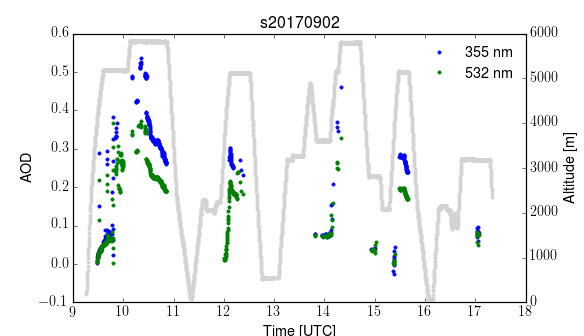

<IPython.core.display.Javascript object>


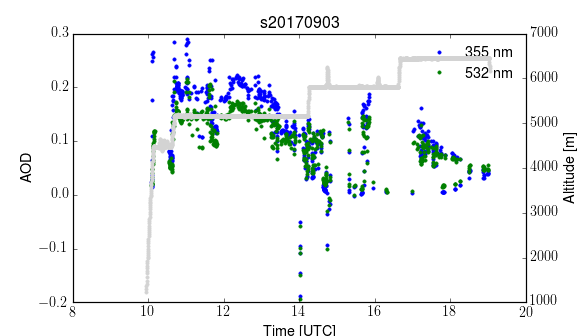

<IPython.core.display.Javascript object>


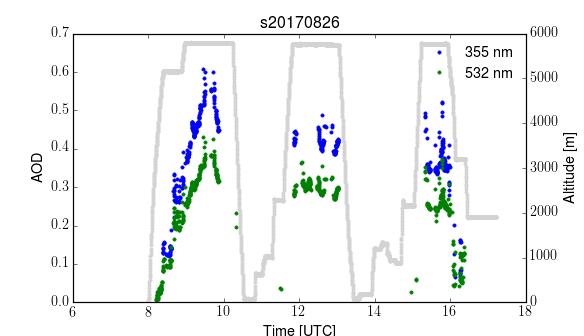

<IPython.core.display.Javascript object>


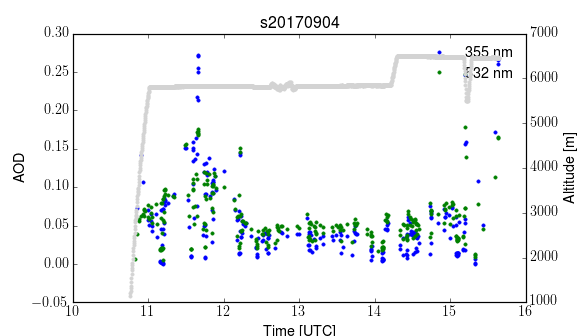

<IPython.core.display.Javascript object>


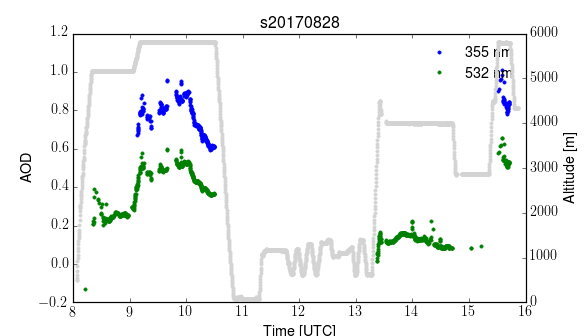

<IPython.core.display.Javascript object>


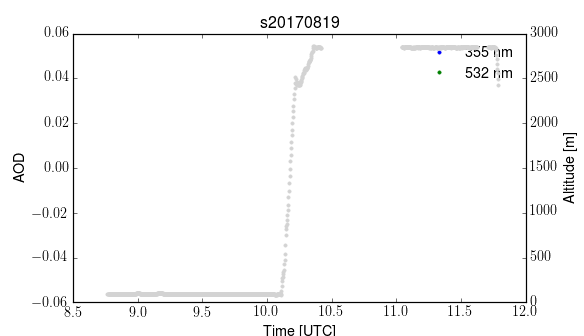

<IPython.core.display.Javascript object>


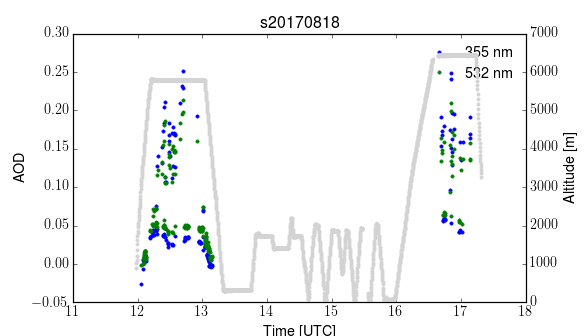

<IPython.core.display.Javascript object>


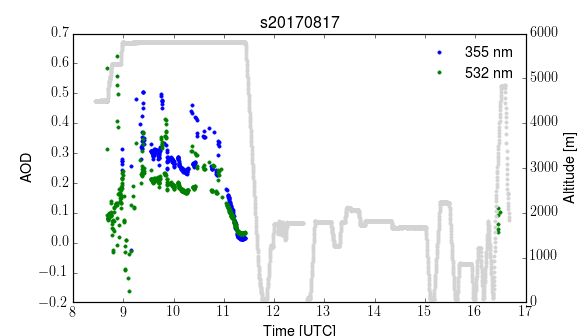

<IPython.core.display.Javascript object>


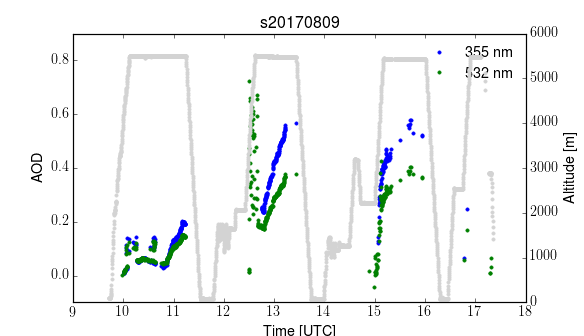

<IPython.core.display.Javascript object>


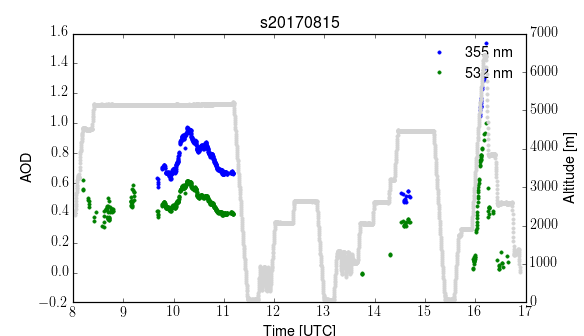

<IPython.core.display.Javascript object>


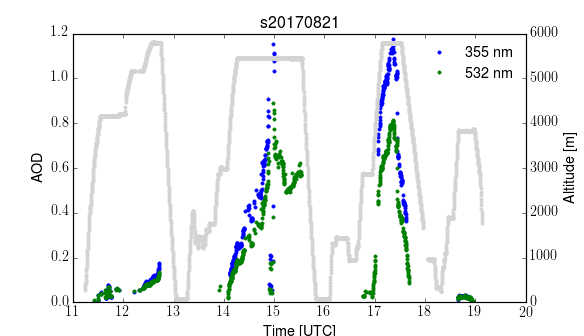

<IPython.core.display.Javascript object>


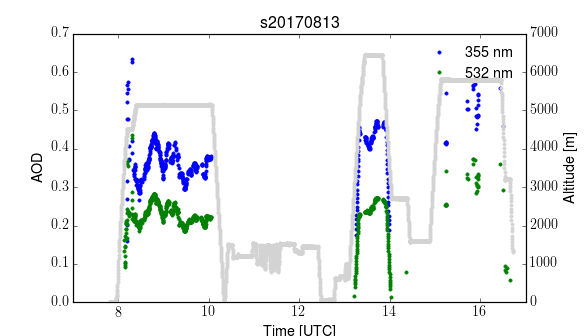

<IPython.core.display.Javascript object>


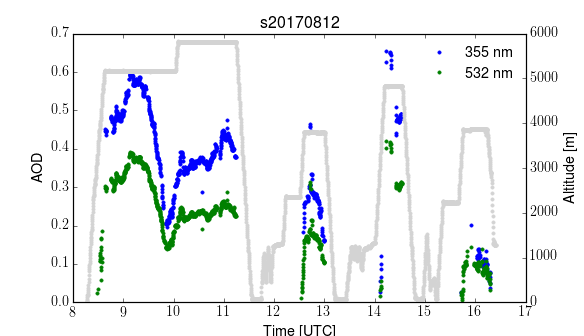

<IPython.core.display.Javascript object>


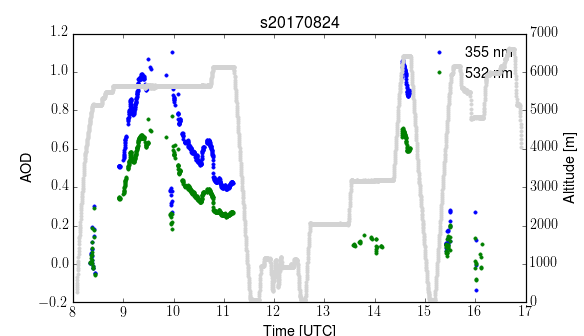

In [284]:
for sk in s7.keys():
    plt.figure()
    plt.plot(s7[sk]['time'],s7[sk]['acaod_355'],'b.',label='355 nm')
    plt.plot(s7[sk]['time'],s7[sk]['acaod_532'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s7[sk]['time'],s7[sk]['alt'],'.',color='lightgrey')
    axy.set_ylabel('Altitude [m]')

### Save the file

In [23]:
hs.savemat(fp7+'ORACLES_2017_HSRL_ACAOD.mat',s7)

## Load the 2018 data

In [14]:
fp8 = fp+'data_other_2018/HSRL/'

In [25]:
f8_hsrl = []
for f8l in os.listdir(fp8):
    if f8l.endswith('.h5'):
        f8_hsrl.append(f8l)

In [26]:
f8_hsrl

[u'HSRL2_P3_20180927_R1.h5',
 u'HSRL2_P3_20180930_R1.h5',
 u'HSRL2_P3_20181002_R1.h5',
 u'HSRL2_P3_20181003_R1.h5',
 u'HSRL2_P3_20181005_R1.h5',
 u'HSRL2_P3_20181007_R1.h5',
 u'HSRL2_P3_20181010_R1.h5',
 u'HSRL2_P3_20181012_R1.h5',
 u'HSRL2_P3_20181015_R1.h5',
 u'HSRL2_P3_20181017_R1.h5',
 u'HSRL2_P3_20181019_R1.h5',
 u'HSRL2_P3_20181021_R1.h5',
 u'HSRL2_P3_20181023_R1.h5',
 u'HSRL2_P3_20181025_R1.h5']

In [27]:
s8 = {}
for i,f in enumerate(f8_hsrl):
    print 'Reading file: '+fp8+f
    hf = hs.h5py.File(fp8+f,'r+') 
    h = {}
    h[u'header'] = hf['000_Readme'].value
    h[u'acaod_355'] = hf['DataProducts']['355_AOT_above_cloud'].value
    h[u'acaod_532'] = hf['DataProducts']['532_AOT_above_cloud'].value
  #  h[u'acaod_355_unc'] = hf['DataUncertainty']['355_AOT_above_cloud_unc'].value
  #  h[u'acaod_532_unc'] = hf['DataUncertainty']['532_AOT_above_cloud_unc'].value
    h[u'cloud_top_height'] = hf['DataProducts']['cloud_top_height'].value
    h[u'date'] = hf['header']['date'].value[0][0]
    h[u'filename'] = f
    try:
        h[u'lat'] = hf['Nav_Data']['gps_lat'].value
        h[u'lon'] = hf['Nav_Data']['gps_lon'].value
        h[u'alt'] = hf['Nav_Data']['gps_alt'].value
        h[u'time'] = hf['Nav_Data']['gps_time'].value
    except:
        h[u'lat'] = hf['ApplanixIMU']['gps_lat'].value
        h[u'lon'] = hf['ApplanixIMU']['gps_lon'].value
        h[u'alt'] = hf['ApplanixIMU']['gps_alt'].value
        h[u'time'] = hf['ApplanixIMU']['gps_time'].value
    h[u'fl'] = h['alt'] >5000.0
    s8[u's{:08.0f}'.format(h['date'])] = h

Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180927_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20180930_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181002_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181003_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181005_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181007_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181010_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181012_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181015_R1.h5
Reading file: /mnt/c/Users/sleblanc/Research/ORACLES/data_other_2018/HSRL/HSRL2_P3_20181017_R1.h5
Reading file: /mnt/c

In [28]:
s8.keys()

[u's20180930',
 u's20181025',
 u's20180927',
 u's20181002',
 u's20181003',
 u's20181005',
 u's20181019',
 u's20181007',
 u's20181017',
 u's20181023',
 u's20181015',
 u's20181021',
 u's20181012',
 u's20181010']

In [29]:
s8['s20181005'].keys()

[u'acaod_355',
 u'lat',
 u'lon',
 u'cloud_top_height',
 u'header',
 u'time',
 u'date',
 u'acaod_532',
 u'filename',
 u'fl',
 u'alt']

### Plot the results

<IPython.core.display.Javascript object>


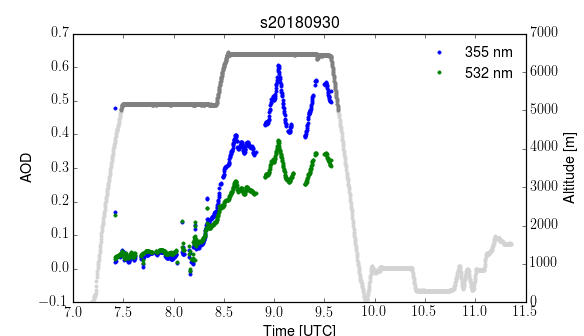

<IPython.core.display.Javascript object>


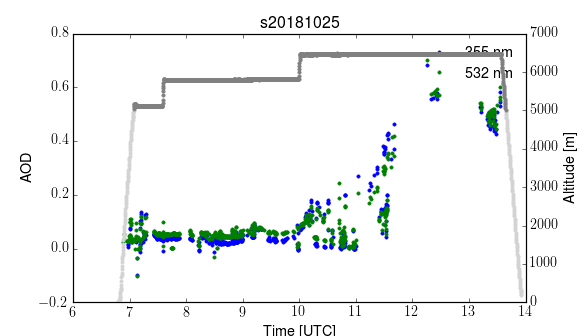

<IPython.core.display.Javascript object>


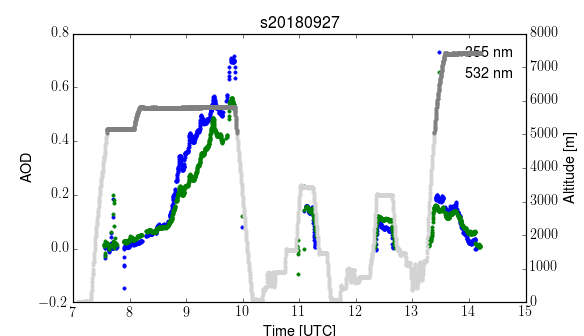

<IPython.core.display.Javascript object>


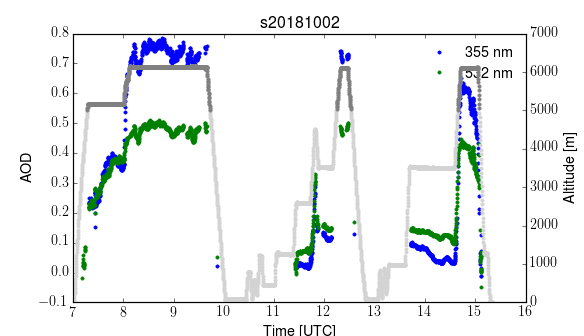

<IPython.core.display.Javascript object>


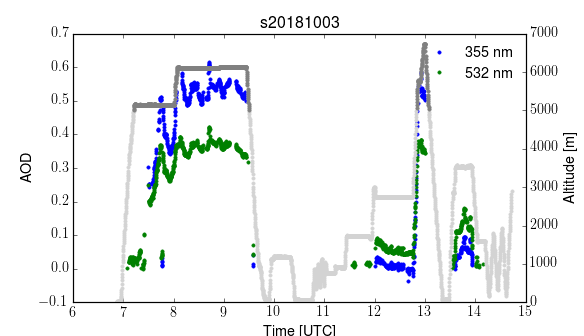

<IPython.core.display.Javascript object>


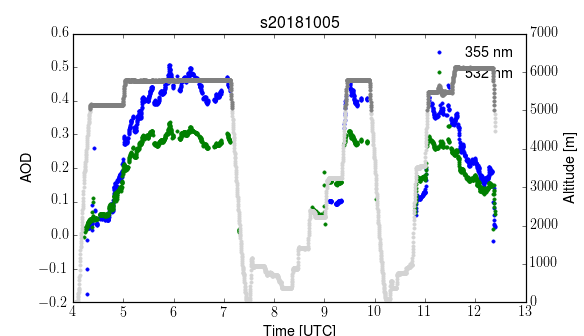

<IPython.core.display.Javascript object>


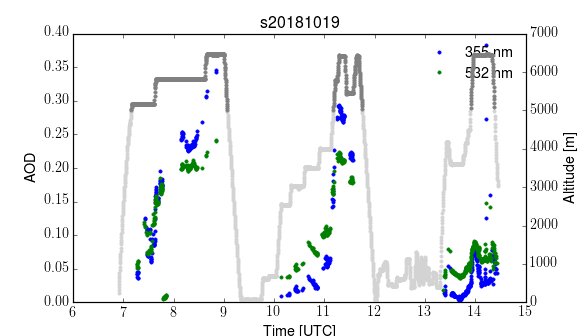

<IPython.core.display.Javascript object>


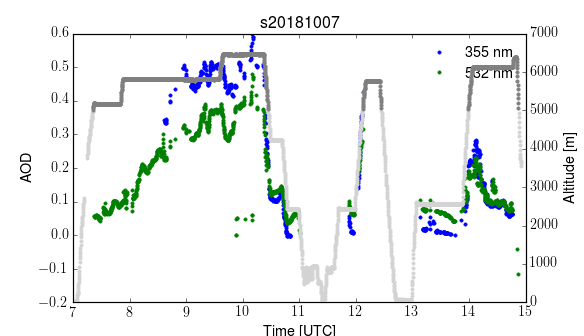

<IPython.core.display.Javascript object>


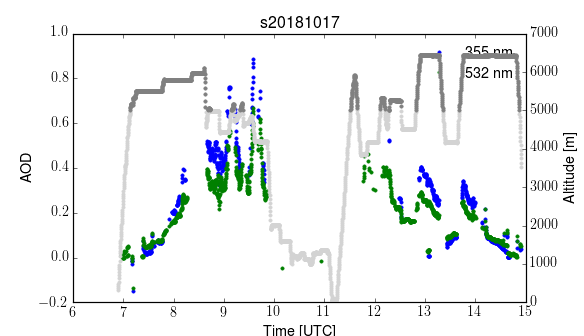

<IPython.core.display.Javascript object>


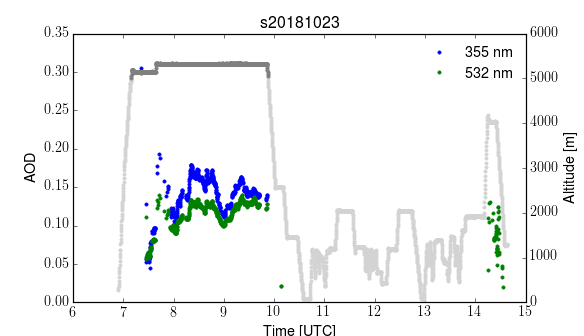

<IPython.core.display.Javascript object>


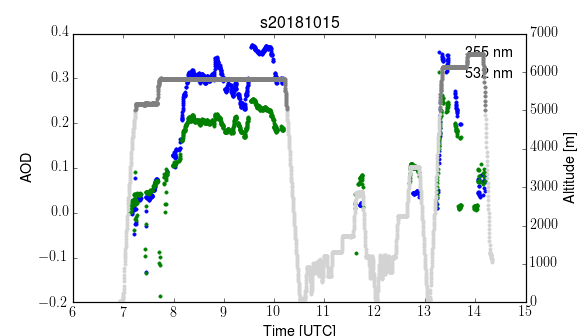

<IPython.core.display.Javascript object>


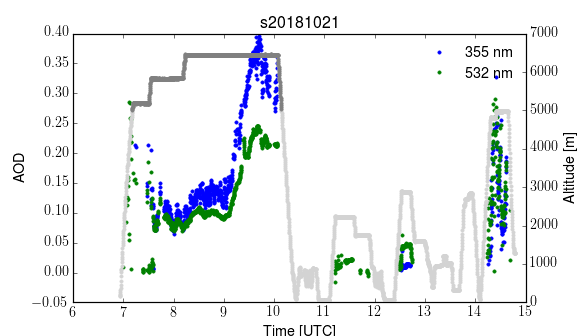

<IPython.core.display.Javascript object>


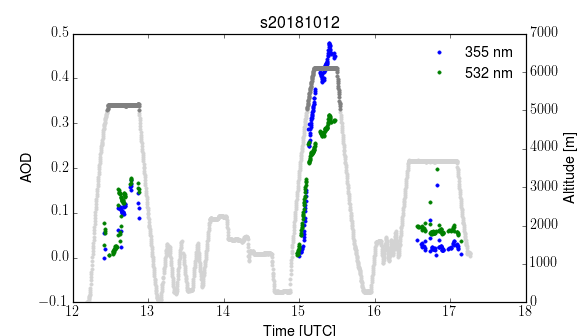

<IPython.core.display.Javascript object>


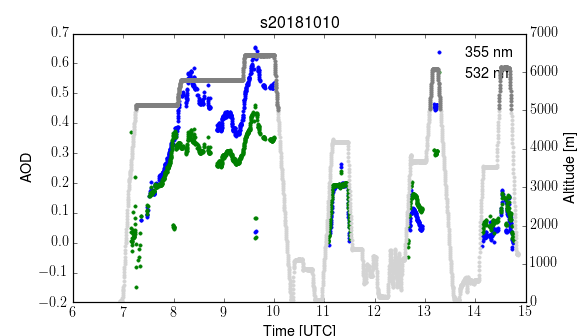

In [289]:
for sk in s8.keys():
    plt.figure()
    plt.plot(s8[sk]['time'],s8[sk]['acaod_355'],'b.',label='355 nm')
    plt.plot(s8[sk]['time'],s8[sk]['acaod_532'],'g.',label='532 nm')
    plt.title(sk)
    plt.legend(frameon=False,numpoints=1)
    plt.ylabel('AOD')
    plt.xlabel('Time [UTC]')
    ax = plt.gca()
    axy = ax.twinx()
    axy.plot(s8[sk]['time'],s8[sk]['alt'],'.',color='lightgrey')
    axy.plot(s8[sk]['time'][s8[sk]['fl']],s8[sk]['alt'][s8[sk]['fl']],'.',color='grey')
    axy.set_ylabel('Altitude [m]')

### Save the file

In [30]:
hs.savemat(fp8+'ORACLES_2018_HSRL_ACAOD.mat',s8)

# Now combine into single array for easier interpretation

## For 2016

In [31]:
hr6 = {}
k6 = s6.keys()
for n in s6[k6[0]].keys():
    try:
        hr6[n] = np.array([],dtype=s6[k6[0]][n].dtype)
    except:
        hr6[n] = np.array([])

In [32]:
for i,d in enumerate(s6.keys()):
    hr6['date'] = np.append(hr6['date'],np.zeros_like(s6[d]['time'][:-1])+s6[d]['date'])
    print len(np.zeros_like(s6[d]['time'])+s6[d]['date']),len(s6[d]['lat'])
    for n in s6[k6[0]].keys():
        hr6[n] = np.append(hr6[n],s6[d][n])

2552 2552
2529 2529
2360 2360
2479 2479
1651 1651
2393 2393
2670 2670
1404 1404
2856 2856


In [33]:
hr6.keys() 

[u'acaod_355',
 u'acaod_355_unc',
 u'lon',
 u'cloud_top_height',
 u'header',
 u'time',
 u'date',
 u'alt',
 u'filename',
 u'lat',
 u'acaod_532',
 u'acaod_532_unc']

In [34]:
len(hr6['acaod_355']),len(hr6['date'])

(20894, 20894)

## For 2017

In [35]:
hr7 = {}
k7 = s7.keys()
for n in s7[k7[0]].keys():
    try:
        hr7[n] = np.array([],dtype=s7[k7[0]][n].dtype)    
    except:
        hr7[n] = np.array([])

In [36]:
for i,d in enumerate(s7.keys()):
    hr7['date'] = np.append(hr7['date'],np.zeros_like(s7[d]['time'][:-1])+s7[d]['date'])
    print len(np.zeros_like(s7[d]['time'])+s7[d]['date']),len(s7[d]['lat'])
    for n in s7[k7[0]].keys():
        hr7[n] = np.append(hr7[n],s7[d][n])

2867 2867
3273 3273
3314 3314
1755 1755
2744 2744
832 832
1856 1856
2919 2919
2665 2665
3168 3168
2775 2775
3195 3195
2918 2918
3175 3175


In [37]:
hr7.keys()

[u'acaod_355',
 u'date',
 u'lon',
 u'cloud_top_height',
 u'header',
 u'time',
 u'lat',
 u'acaod_532',
 u'filename',
 u'fl',
 u'alt']

In [38]:
len(hr7['acaod_355']), len(hr7['date'])

(37456, 37456)

## For 2018

In [39]:
hr8 = {}
k8 = s8.keys()
for n in s8[k8[0]].keys():
    try:
        hr8[n] = np.array([],dtype=s8[k8[0]][n].dtype)
    except:
        hr8[n] = np.array([])

In [40]:
for i,d in enumerate(s8.keys()):
    hr8['date'] = np.append(hr8['date'],np.zeros_like(s8[d]['time'][:-1])+s8[d]['date'])
    for n in s8[k8[0]].keys():
        hr8[n] = np.append(hr8[n],s8[d][n])

In [41]:
hr8.keys()

[u'acaod_355',
 u'date',
 u'lon',
 u'cloud_top_height',
 u'header',
 u'time',
 u'lat',
 u'acaod_532',
 u'filename',
 u'fl',
 u'alt']

In [42]:
len(hr8['acaod_355']),len(hr8['date'])

(36728, 36728)

In [43]:
hr8['fl']

array([False, False, False, ..., False, False, False], dtype=bool)

## Now save these new combined arrays

In [44]:
hs.savemat(fp6+'ORACLES_2016_HSRL_ACAOD_arr.mat',hr6)

In [45]:
hs.savemat(fp7+'ORACLES_2017_HSRL_ACAOD_arr.mat',hr7)

In [46]:
hs.savemat(fp8+'ORACLES_2018_HSRL_ACAOD_arr.mat',hr8)

## Alternatively load the saved files

In [11]:
hr6 = hs.loadmat(fp6+'ORACLES_2016_HSRL_ACAOD_arr.mat')

In [16]:
hr7 = hs.loadmat(fp7+'ORACLES_2017_HSRL_ACAOD_arr.mat')

In [17]:
hr8 = hs.loadmat(fp8+'ORACLES_2018_HSRL_ACAOD_arr.mat')

# Now make nice plots

## Plot out some histograms

<IPython.core.display.Javascript object>


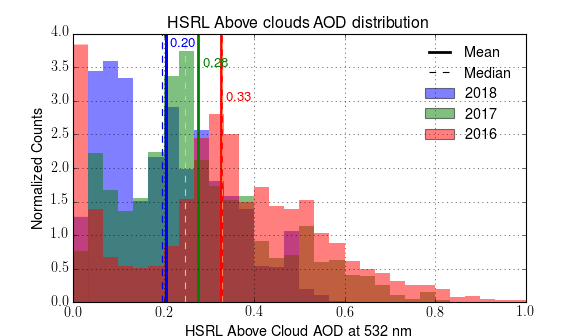

In [445]:
plt.figure()
plt.hist(hr8['acaod_532'][hr8['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='b',label='2018')
plt.hist(hr7['acaod_532'][hr7['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='g',label='2017')
plt.hist(hr6['acaod_532'],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='r',label='2016')

#plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl3']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='800-2200 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(hr8['acaod_532'][hr8['fl']]),ls='-',color='k',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(hr8['acaod_532'][hr8['fl']]),ls='--',color='k',label='Median')
plt.axvline(x=np.nanmean(hr8['acaod_532'][hr8['fl']]),ls='-',color='b',lw=2.5)
plt.axvline(x=np.nanmedian(hr8['acaod_532'][hr8['fl']]),ls='--',color='b')

plt.axvline(x=np.nanmean(hr6['acaod_532']),ls='-',color='r',lw=2.5)
plt.axvline(x=np.nanmedian(hr6['acaod_532']),ls='--',color='coral')

plt.axvline(x=np.nanmean(hr7['acaod_532'][hr7['fl']]),ls='-',color='g',lw=2.5)
plt.axvline(x=np.nanmedian(hr7['acaod_532'][hr7['fl']]),ls='--',color='lightgreen')

plt.text(np.nanmean(hr6['acaod_532'])+0.01,3,'{:0.2f}'.format(np.nanmean(hr6['acaod_532'])),color='r')
plt.text(np.nanmean(hr7['acaod_532'][hr7['fl']])+0.01,3.5,'{:0.2f}'.format(np.nanmean(hr7['acaod_532'][hr7['fl']])),color='g')
plt.text(np.nanmean(hr8['acaod_532'][hr8['fl']])+0.01,3.8,'{:0.2f}'.format(np.nanmean(hr8['acaod_532'][hr8['fl']])),color='b')



plt.xlabel('HSRL Above Cloud AOD at 532 nm ')
plt.ylabel('Normalized Counts')
plt.grid()
plt.title('HSRL Above clouds AOD distribution')
#prelim()
plt.legend(frameon=False)
plt.savefig(fp+'plot_all/HSRL_AOD_Above_cloud_normed_histogram_2018_2017_2016.png',dpi=600,transparent=True)

## Plot out AOD vs. DOY for regional subset (all 3 years)

In [18]:
lat1,lat2 = -17.0,-10.0
lon1,lon2 = 3.5,6.75

In [19]:
hr6['flq'] =  (hr6['lat']>lat1) & (hr6['lat']<lat2) & (hr6['lon']>lon1) & (hr6['lon']<lon2) & (hr6['acaod_532']<1.5)
hr7['flq'] = hr7['fl'] & (hr7['lat']>lat1) & (hr7['lat']<lat2) & (hr7['lon']>lon1) & (hr7['lon']<lon2) & (hr7['acaod_532']<1.5)
hr8['flq'] = hr8['fl'] & (hr8['lat']>lat1) & (hr8['lat']<lat2) & (hr8['lon']>lon1) & (hr8['lon']<lon2) & (hr8['acaod_532']<1.5)

/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
hr6['ndtime2'] = np.array([datetime(2018,int((d-20160000)/100.0),int(d%100),int(hr6['time'][i]),
                          int((hr6['time'][i]-float(int(hr6['time'][i])))*60)) for i,d in enumerate(hr6['date'])])
hr7['ndtime2'] = np.array([datetime(2018,int((d-20170000)/100.0),int(d%100),int(hr7['time'][i]),
                          int((hr7['time'][i]-float(int(hr7['time'][i])))*60)) for i,d in enumerate(hr7['date'])])
hr8['ndtime2'] = np.array([datetime(2018,int((d-20180000)/100.0),int(d%100),int(hr8['time'][i]),
                          int((hr8['time'][i]-float(int(hr8['time'][i])))*60)) for i,d in enumerate(hr8['date'])])

In [21]:
bin_aod6,bin_doy6,bin_num6 = [],[],[]
bin_days6 = np.unique(hr6['date'][hr6['flq']])
for d in bin_days6:
    flh = (hr6['date'][hr6['flq']]==d)
    bin_doy6.append(hr6['ndtime2'][hr6['flq']][flh][0].timetuple().tm_yday)
    bin_aod6.append(hr6['acaod_532'][hr6['flq']][flh])
    bin_num6.append(len(hr6['acaod_532'][hr6['flq']][flh]))

In [22]:
bin_aod7,bin_doy7,bin_num7 = [],[],[]
bin_days7 = np.unique(hr7['date'][hr7['flq']])
for d in bin_days7:
    flh = (hr7['date'][hr7['flq']]==d)
    bin_doy7.append(hr7['ndtime2'][hr7['flq']][flh][0].timetuple().tm_yday)
    bin_aod7.append(hr7['acaod_532'][hr7['flq']][flh])
    bin_num7.append(len(hr7['acaod_532'][hr7['flq']][flh]))

In [23]:
bin_aod8,bin_doy8,bin_num8 = [],[],[]
bin_days8 = np.unique(hr8['date'][hr8['flq']])
for d in bin_days8:
    flh = (hr8['date'][hr8['flq']]==d)
    bin_doy8.append(hr8['ndtime2'][hr8['flq']][flh][0].timetuple().tm_yday)
    bin_aod8.append(hr8['acaod_532'][hr8['flq']][flh])
    bin_num8.append(len(hr8['acaod_532'][hr8['flq']][flh]))

<IPython.core.display.Javascript object>


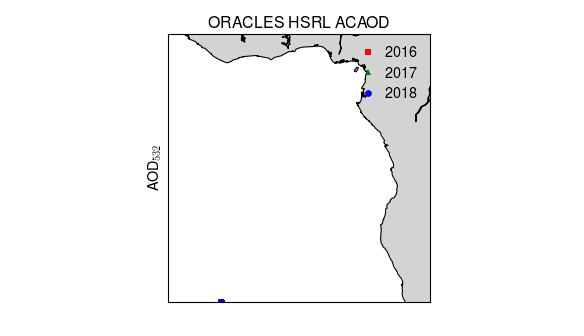

In [463]:
plt.figure()
plt.plot(hr6['ndtime2'][hr6['flq']],hr6['acaod_532'][hr6['flq']],'rs',label='2016',markeredgecolor='None')
plt.plot(hr7['ndtime2'][hr7['flq']],hr7['acaod_532'][hr7['flq']],'g^',label='2017',markeredgecolor='None')
plt.plot(hr8['ndtime2'][hr8['flq']],hr8['acaod_532'][hr8['flq']],'bo',label='2018',markeredgecolor='None')
plt.title('ORACLES HSRL ACAOD')
monthyearFmt = mdates.DateFormatter('%B')
monthyearFmt2 = mdates.DateFormatter('%m/%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt2)
#plt.gca().xaxis.set_minor_formatter(monthyearFmt2)
plt.xticks(rotation=90)
plt.gca().set_xlim([datetime(2018, 7, 30), datetime(2018, 10, 30)])
plt.legend(frameon=False,numpoints=1,handletextpad=0.2)
plt.ylabel('AOD_{{532}}')
plt.savefig(fp+'plot_all/ORACLESall_HSRL_AOD_monthly.png',
            transparent=True,dpi=500)

In [464]:
def mapfig(ax=plt.gca()):
    m = Basemap(projection='merc',llcrnrlat=-25,urcrnrlat=8,llcrnrlon=-15,urcrnrlon=18,resolution='l',ax=ax)
    m.drawcoastlines()
    #m.drawmeridians(np.linspace(-17,11,8),labels=[0,0,0,1],linewidth=0.1)
    #m.drawparallels(np.linspace(-18,4,12),labels=[1,0,0,0],linewidth=0.1)
    m.drawlsmask(land_color='lightgrey',ocean_color='None',lakes=True)
    #m.shadedrelief(alpha=0.4)
    return m

<IPython.core.display.Javascript object>


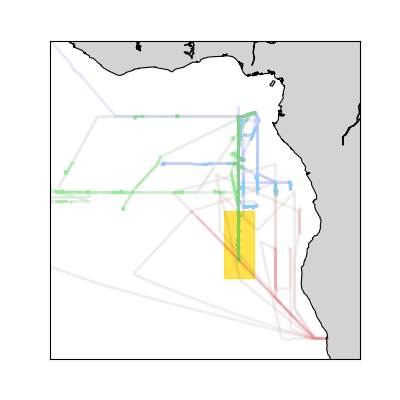

In [465]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax1 = ax
#ax1 = plt.subplot(1,2,1)
m = mapfig(ax=ax1)
x6,y6 = m(hr6['lon'],hr6['lat'])
m.plot(x6,y6,'.',color='lightcoral',alpha=0.002,markeredgecolor='None')

x7,y7 = m(hr7['lon'],hr7['lat'])
m.plot(x7,y7,'.',color='lightgreen',alpha=0.002,markeredgecolor='None')

x8,y8 = m(hr8['lon'],hr8['lat'])
m.plot(x8,y8,'.',color='lightskyblue',alpha=0.002,markeredgecolor='None')

xss,yss = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat2,lat2,lat1,lat1])
xss2,yss2 = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat1,lat1,lat1,lat1])

plt.fill_between(xss, yss, yss2,color='gold',alpha=0.7)
#plt.Polygon(xss,yss,edgecolor='None',color='gold',alpha=0.3)

In [19]:
def set_box_whisker_color(cl,bp,binned_ndays):
    bndm = np.nanmax(binned_ndays)*1.0
    for j,b in enumerate(bp['boxes']):
        b.set_facecolor(cl(binned_ndays[j]*1.0/bndm))
        b.set_edgecolor(cl(binned_ndays[j]*1.0/bndm))
        #b.set_alpha(0.4)
    for j,b in enumerate(bp['means']):
        b.set_marker('.')
        b.set_color('None')
        b.set_markerfacecolor('darkgreen')
        b.set_markeredgecolor('darkgreen')
        b.set_alpha(0.6)
    for j,b in enumerate(bp['whiskers']):
        b.set_linestyle('-')
        b.set_color('pink') #gr(binned_ndays[j]*1.0/bndm))
        b.set_alpha(0.7)
    for j,b in enumerate(bp['caps']):
        b.set_alpha(0.7)
        b.set_color('pink')#gr(binned_ndays[j]*1.0/bndm))
    for j,b in enumerate( bp['medians']):
        b.set_linewidth(4)
        b.set_color('gold')
        b.set_alpha(0.4)
    
    return

In [24]:
fp

u'/mnt/c/Users/lebla/Research/ORACLES/'

In [26]:
hs.savemat(fp+'data_other/HSRL/ORACLES_binned_HSRL_allyears.mat',
           {u'bin_aod6':bin_aod6,u'bin_aod7':bin_aod7,u'bin_aod8':bin_aod8,
            u'bin_doy6':bin_doy6,u'bin_doy7':bin_doy7,u'bin_doy8':bin_doy8,
            u'bin_num6':bin_num6,u'bin_num7':bin_num7,u'bin_num8':bin_num8})

<IPython.core.display.Javascript object>


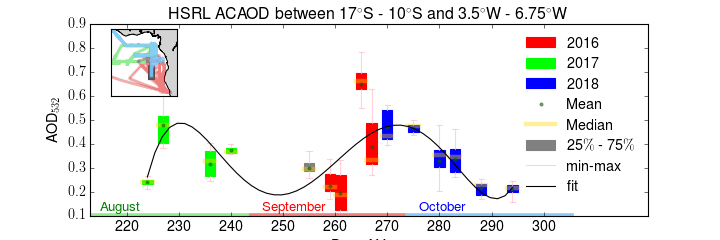

In [469]:
plt.figure(figsize=(9,3))
bp = plt.boxplot(bin_aod6,positions=bin_doy6,vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
bl = plt.cm.bwr
set_box_whisker_color(bl,bp,np.array(bin_num6)*0.0+3130)

bp7 = plt.boxplot(np.array(bin_aod7),positions=np.array(bin_doy7),vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
gr = plt.cm.brg
set_box_whisker_color(gr,bp7,np.array(bin_num7)*0.0+870)

bp8 = plt.boxplot(np.array(bin_aod8),positions=np.array(bin_doy8),vert=True,
                showfliers=False,widths=2,showmeans=True,patch_artist=True)
by = plt.cm.bwr_r
set_box_whisker_color(by,bp8,np.array(bin_num8)*0.0+760)

xy6 = [[r.get_data()[0],r.get_data()[1]] for r in bp['means']]
xy6 = np.array(xy6)[:,:,0]
xy7 = [[r.get_data()[0],r.get_data()[1]] for r in bp7['means']]
xy7 = np.array(xy7)[:,:,0]
xy8 = [[r.get_data()[0],r.get_data()[1]] for r in bp8['means']]
xy8 = np.array(xy8)[:,:,0]
xx = np.append(np.append(xy7[:,0],xy6[:,0]),xy8[:,0])
yy = np.append(np.append(xy7[:,1],xy6[:,1]),xy8[:,1])
xn = np.linspace(xx.min(),xx.max(),50)
spl = UnivariateSpline(xx,yy, k=5)
lb = plt.plot(xn,spl(xn),'-k',label='fit')

plt.xlim(213,320)
plt.ylim(0.1,0.9)
plt.xticks([220,230,240,250,260,270,280,290,300])
plt.gca().set_xticklabels([220,230,240,250,260,270,280,290,300])

plt.plot([213,243],[0.1,0.1],'-',color='lightgreen',lw=6)
plt.plot([244,273],[0.1,0.1],'-',color='lightcoral',lw=6)
plt.plot([274,305],[0.1,0.1],'-',color='lightskyblue',lw=6)
plt.text(215,0.12,'August',color='g')
plt.text(246,0.12,'September',color='r')
plt.text(276,0.12,'October',color='b')

plt.ylabel('AOD_{{532}}')
plt.xlabel('Day of Year')
plt.title('HSRL ACAOD between 17$^{{\circ}}$S - 10$^{{\circ}}$S and 3.5$^{{\circ}}$W - 6.75$^{{\circ}}$W')

#plt.grid()
bp['boxes'][0].set_color('grey')
plt.legend([bp['boxes'][1],bp7['boxes'][0],bp8['boxes'][0],bp['means'][0],bp['medians'][0],bp['boxes'][0],
            bp['whiskers'][0],lb[0]],
           ['2016','2017','2018','Mean','Median','25$\%$ - 75$\%$','min-max','fit'],frameon=False,numpoints=1)

axb = plt.gcf().add_axes([0.06, 0.6, 0.28, 0.28])
m = mapfig(ax=axb)
x6,y6 = m(hr6['lon'],hr6['lat'])
m.plot(x6,y6,'.',color='lightcoral',alpha=0.006,markeredgecolor='None')

x7,y7 = m(hr7['lon'],hr7['lat'])
m.plot(x7,y7,'.',color='lightgreen',alpha=0.006,markeredgecolor='None')

x8,y8 = m(hr8['lon'],hr8['lat'])
m.plot(x8,y8,'.',color='lightskyblue',alpha=0.05,markeredgecolor='None')

xss,yss = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat2,lat2,lat1,lat1])
xss2,yss2 = m([lon1,lon1,lon2,lon2,lon1],[lat1,lat1,lat1,lat1,lat1])

plt.fill_between(xss, yss, yss2,color='k',alpha=0.6)

plt.savefig(fp+'plot_all/ORACLESall_HSRL_AOD_monthly_hist_map.png',
            transparent=True,dpi=500)

## Set up mapping statistics

In [20]:
uniq_cnt = lambda x: len(np.unique(x))

In [21]:
fl6 = np.isfinite(hr6['acaod_532'])& np.isfinite(hr6['lat'])& np.isfinite(hr6['lon'])
fl7 = (hr7['fl']) & np.isfinite(hr7['acaod_532'])& np.isfinite(hr7['lat'])& np.isfinite(hr7['lon'])
fl8 = (hr8['fl']) & np.isfinite(hr8['acaod_532'])& np.isfinite(hr8['lat'])& np.isfinite(hr8['lon'])

In [22]:
hr6['bin_mean'],xe6,ye6,bn = st.binned_statistic_2d(hr6['lat'][fl6],hr6['lon'][fl6],
                                    hr6['acaod_532'][fl6],bins=36,range=[[-25,2],[-16,16]])
hr6['bin_mean'] = np.ma.masked_array(hr6['bin_mean'],np.isnan(hr6['bin_mean']))

hr6['bin_nday'],xe6,ye6,bn = st.binned_statistic_2d(hr6['lat'][fl6],hr6['lon'][fl6],
                                                    hr6['date'][fl6],bins=36,range=[[-25,2],[-16,16]],statistic=uniq_cnt)
hr6['bin_nday'] = np.ma.masked_array(hr6['bin_nday'],np.isnan(hr6['bin_nday']))

In [23]:
hr7['bin_mean'],xe7,ye7,bn = st.binned_statistic_2d(hr7['lat'][fl7],hr7['lon'][fl7],
                                    hr7['acaod_532'][fl7],bins=36,range=[[-25,2],[-16,16]])
hr7['bin_mean'] = np.ma.masked_array(hr7['bin_mean'],np.isnan(hr7['bin_mean']))
hr7['bin_nday'],xe7,ye7,bn = st.binned_statistic_2d(hr7['lat'][fl7],hr7['lon'][fl7],
                                                    hr7['date'][fl7],bins=36,range=[[-25,2],[-16,16]],statistic=uniq_cnt)
hr7['bin_nday'] = np.ma.masked_array(hr7['bin_nday'],np.isnan(hr7['bin_nday']))

In [24]:
hr8['bin_mean'],xe8,ye8,bn = st.binned_statistic_2d(hr8['lat'][fl8],hr8['lon'][fl8],
                                    hr8['acaod_532'][fl8],bins=36,range=[[-25,2],[-16,16]])
hr8['bin_mean'] = np.ma.masked_array(hr8['bin_mean'],np.isnan(hr8['bin_mean']))
hr8['bin_nday'],xe8,ye8,bn = st.binned_statistic_2d(hr8['lat'][fl8],hr8['lon'][fl8],
                                                    hr8['date'][fl8],bins=36,range=[[-25,2],[-16,16]],statistic=uniq_cnt)
hr8['bin_nday'] = np.ma.masked_array(hr8['bin_nday'],np.isnan(hr8['bin_nday']))

In [25]:
hr7['bin_mean'].sum()

23.4879044260142

In [26]:
len(hr7['lat'])

37456

In [27]:
ia6 = np.where((hr6['bin_nday'].data>0.0))
ia7 = np.where((hr7['bin_nday'].data>0.0))
ia8 = np.where((hr8['bin_nday'].data>0.0))

## Make map plotting

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

<IPython.core.display.Javascript object>


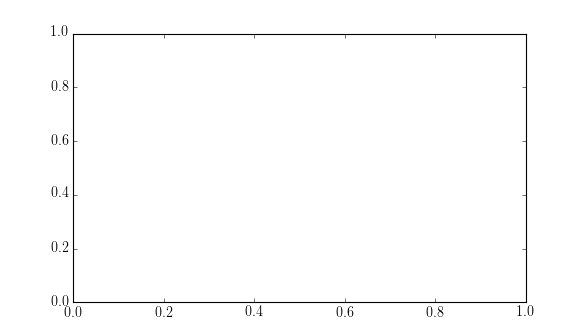

In [29]:
def mapfig(ax=plt.gca()):
    m = Basemap(projection='merc',llcrnrlat=-25,urcrnrlat=2,llcrnrlon=-16,urcrnrlon=16,resolution='l',ax=ax)
    m.drawcoastlines()
    m.drawmeridians(np.linspace(-17,11,8),labels=[0,0,0,1],linewidth=0.1)
    m.drawparallels(np.linspace(-26,4,11),labels=[1,0,0,0],linewidth=0.1)
    m.shadedrelief(alpha=0.4)
    return m

<IPython.core.display.Javascript object>


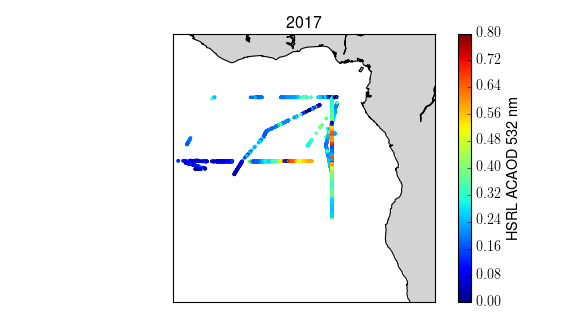

In [481]:
fig,ax = plt.subplots(1,1)

m=mapfig(ax=ax)
mx,my = m(hr7['lon'][hr7['fl']],hr7['lat'][hr7['fl']])
ps = plt.scatter(mx,my,s=10,c=hr7['acaod_532'][hr7['fl']],vmin=0.0,vmax=0.8,edgecolors='None')
plt.title('2017')
cb = plt.colorbar(ps)
cb.set_label('HSRL ACAOD 532 nm')

<IPython.core.display.Javascript object>


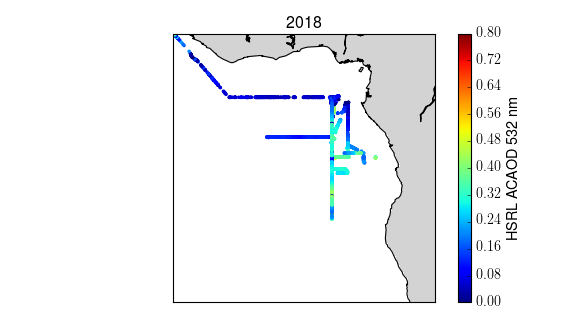

In [482]:
fig,ax = plt.subplots(1,1)

m=mapfig(ax=ax)
mx,my = m(hr8['lon'][hr8['fl']],hr8['lat'][hr8['fl']])
ps = plt.scatter(mx,my,s=10,c=hr8['acaod_532'][hr8['fl']],vmin=0.0,vmax=0.8,edgecolors='None')
plt.title('2018')
cb = plt.colorbar(ps)
cb.set_label('HSRL ACAOD 532 nm')

<IPython.core.display.Javascript object>


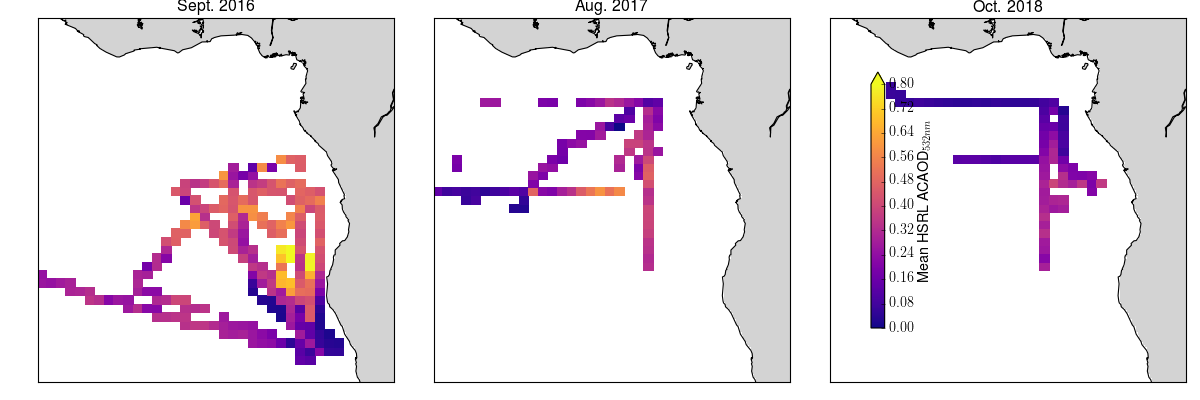

In [558]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.flatten()

ax1 = ax[0]
m = mapfig(ax=ax1)
mx,my = m(ye6,xe6)
p = ax1.pcolor(mx,my,hr6['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
ax1.set_title('Sept. 2016')
#cb = m.colorbar(p,extend='both')

ax2 = ax[1]
m = mapfig(ax=ax2)
mx,my = m(ye7,xe7)
p = ax2.pcolor(mx,my,hr7['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
ax2.set_title('Aug. 2017')
#cb = m.colorbar(p,extend='both')

ax3 = ax[2]
m = mapfig(ax=ax3)
mx,my = m(ye8,xe8)
p = ax3.pcolor(mx,my,hr8['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
ax3.set_title('Oct. 2018')

#divider = make_axes_locatable(ax3)
#cax = divider.append_axes("right", size="5%", pad=0.05)
go = ax3.get_position()
bot = go.corners()[0,1]
lef = go.corners()[0,0]

cax = fig.add_axes([lef*1.04,bot+go.height*0.1,go.width*0.05,go.height*0.8])
cb = plt.colorbar(p,cax=cax,extend='max')
cb.set_label('Mean HSRL ACAOD$_{{532nm}}$')

plt.tight_layout(rect=[0.02,0,1,1],w_pad=3)

<IPython.core.display.Javascript object>


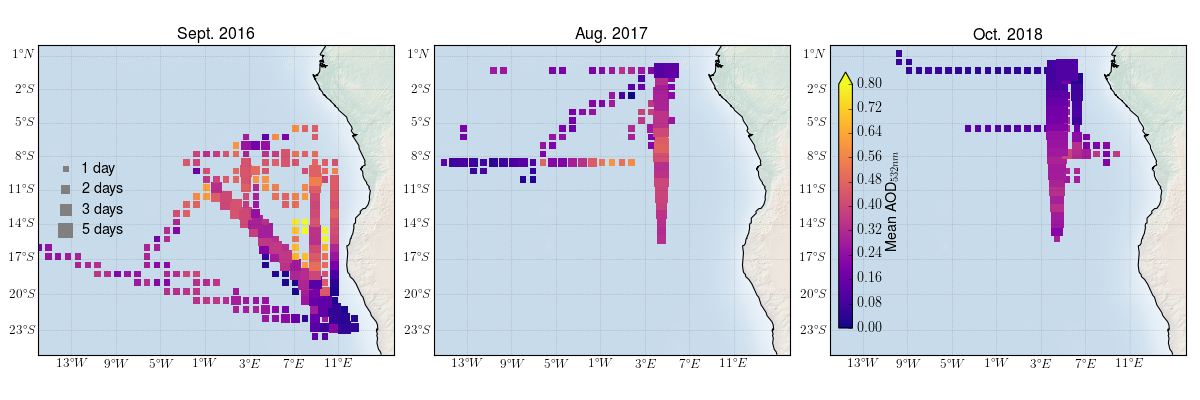

In [66]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.flatten()

ax1 = ax[0]
m = mapfig(ax=ax1)
mx,my = m(ye6,xe6)
p = ax1.scatter(mx[ia6[1]],my[ia6[0]],hr6['bin_nday'].data[ia6[0],ia6[1]]*35,
                c=hr6['bin_mean'].data[ia6[0],ia6[1]],
               marker='s',edgecolor='None',cmap='plasma',vmin=0.0,vmax=0.8)
#p = ax1.pcolor(mx,my,ar6['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
ax1.set_title('Sept. 2016')
#cb = m.colorbar(p,extend='both')

sizes = [1,2,3,5] #[10,100,500,1500]
labels = ['{0} day{1}'.format(z,'s' if z>1 else '') for z in sizes]
points = [ax1.scatter([], [], s=z*35, c='grey',marker='s',edgecolor='None') for z in sizes]
ax1.legend(points, labels, scatterpoints=1,frameon=False,loc='center left',handletextpad=0.1)

ax2 = ax[1]
m = mapfig(ax=ax2)
mx,my = m(ye7,xe7)
p = ax2.scatter(mx[ia7[1]],my[ia7[0]],hr7['bin_nday'].data[ia7[0],ia7[1]]*35,
                c=hr7['bin_mean'].data[ia7[0],ia7[1]],
               marker='s',edgecolor='None',cmap='plasma',vmin=0.0,vmax=0.8)
#p = ax2.pcolor(mx,my,ar7['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
ax2.set_title('Aug. 2017')

ax3 = ax[2]
m = mapfig(ax=ax3)
mx,my = m(ye8,xe8)
p = ax3.scatter(mx[ia8[1]],my[ia8[0]],hr8['bin_nday'].data[ia8[0],ia8[1]]*35,
                c=hr8['bin_mean'].data[ia8[0],ia8[1]],
               marker='s',edgecolor='None',cmap='plasma',vmin=0.0,vmax=0.8)
#p = ax3.pcolor(mx,my,ar8['bin_mean'],vmin=0.0,vmax=0.8,cmap='plasma')
ax3.set_title('Oct. 2018')
#prelim()
go = ax3.get_position()
bot = go.corners()[0,1]
lef = go.corners()[0,0]
cax = fig.add_axes([lef*1.04,bot+go.height*0.1,go.width*0.05,go.height*0.8])
cb = plt.colorbar(p,cax=cax,extend='max')
cb.set_label('Mean AOD$_{{532nm}}$')

plt.tight_layout(rect=[0.02,0,1,1],w_pad=3)


plt.savefig(fp+'plot_all/ORACLESall_HSRL_AOD_3map_stats_R1.png',
            transparent=True,dpi=500)

# Now build maps by binning per day

In [33]:
days6 = np.unique(hr6['date'])
days7 = np.unique(hr7['date'])
days8 = np.unique(hr8['date'])

In [37]:
aod_bins6 = []
for i,d in enumerate(days6):
    fl6 = np.isfinite(hr6['acaod_532'])& np.isfinite(hr6['lat'])& np.isfinite(hr6['lon']) & (hr6['date']==d)
    ab,xe6,ye6,bn = st.binned_statistic_2d(hr6['lat'][fl6],hr6['lon'][fl6],
                                    hr6['acaod_532'][fl6],bins=36,range=[[-25,2],[-16,16]])
    ab = np.ma.masked_array(ab,np.isnan(ab))
    aod_bins6.append(ab)

In [35]:
len(aod_bins)

9

In [38]:
aod_bins7 = []
for i,d in enumerate(days7):
    fl7 = (hr7['fl']) & np.isfinite(hr7['acaod_532'])& np.isfinite(hr7['lat'])& np.isfinite(hr7['lon']) & (hr7['date']==d)
    ab,xe7,ye7,bn = st.binned_statistic_2d(hr7['lat'][fl7],hr7['lon'][fl7],
                                    hr7['acaod_532'][fl7],bins=36,range=[[-25,2],[-16,16]])
    ab = np.ma.masked_array(ab,np.isnan(ab))
    aod_bins7.append(ab)

In [39]:
aod_bins8 = []
for i,d in enumerate(days8):
    fl8 = (hr8['fl']) & np.isfinite(hr8['acaod_532'])& np.isfinite(hr8['lat'])& np.isfinite(hr8['lon']) & (hr8['date']==d)
    ab,xe8,ye8,bn = st.binned_statistic_2d(hr8['lat'][fl7],hr8['lon'][fl7],
                                    hr8['acaod_532'][fl7],bins=36,range=[[-25,2],[-16,16]])
    ab = np.ma.masked_array(ab,np.isnan(ab))
    aod_bins8.append(ab)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 36728 but corresponding boolean dimension is 37456
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 36728 but corresponding boolean dimension is 37456
  """


# Load the 4STAR data

In [40]:
ar6 = hs.loadmat(fp+'/aod_ict/v8/R3/all_aod_ict_R3_2016.mat')

In [41]:
ar6['flac'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)
ar6['flacr'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&(ar6['fl_routine'])
ar6['flaco'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&~(ar6['fl_routine'])

In [42]:
ar6['flr'] = (ar6['qual_flag']==0) & (ar6['fl_routine'])
ar6['flo'] = (ar6['qual_flag']==0) & ~(ar6['fl_routine'])
ar6['fl'] = (ar6['qual_flag']==0)

In [43]:
ar7 = hs.loadmat(fp+'/aod_ict_2017/R1/all_aod_ict_R1_2017.mat')

In [44]:
ar7['flac'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)
ar7['flacr'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&(ar7['fl_routine'])
ar7['flaco'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&~(ar7['fl_routine'])

In [45]:
ar7['flr'] = (ar7['qual_flag']==0) & (ar7['fl_routine'])
ar7['flo'] = (ar7['qual_flag']==0) & ~(ar7['fl_routine'])
ar7['fl'] = (ar7['qual_flag']==0)

In [46]:
ar8 = hs.loadmat(fp+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv='R1'))

In [47]:
ar8['flac'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)  
ar8['flacr'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&(ar8['fl_routine']) 
ar8['flaco'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&~(ar8['fl_routine'])

In [48]:
ar8['flr'] = (ar8['qual_flag']==0) & (ar8['fl_routine'])
ar8['flo'] = (ar8['qual_flag']==0) & (ar8['fl_routine']==False)
ar8['fl'] = (ar8['qual_flag']==0)

## Now subset 4STAR AOD for each of the days 

In [49]:
ar6.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD0530',
 u'UNCAOD0550',
 u'UNCAOD0700',
 u'AOD0355',
 u'AOD1627',
 u'AOD0520',
 u'UNCAOD0620',
 u'AOD0606',
 u'AOD1064',
 u'Latitude',
 u'UNCAOD0452',
 u'fl_alt_6',
 u'AOD0620',
 u'AOD0700',
 u'AOD0550',
 u'AOD0660',
 'flaco',
 u'UNCAOD1627',
 u'AOD0452',
 u'fl_routine',
 u'AOD0470',
 u'fl1',
 u'UNCAOD1236',
 u'fl3',
 u'fl2',
 'flo',
 u'UNCAOD1064',
 u'UNCAOD0501',
 u'AOD_angstrom_470_865',
 u'AOD_polycoef_a0',
 u'AOD_polycoef_a2',
 u'UNCAOD0606',
 u'UNCAOD0355',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD1559',
 u'UNCAOD1650',
 u'UNCAOD1559',
 u'UNCAOD1250',
 u'AOD0501',
 u'Longitude',
 u'AOD_polycoef_a1',
 u'UNCAOD0660',
 u'GPS_Alt',
 u'AOD1250',
 u'flac',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD1650',
 u'UNCAOD0470',
 u'AOD0380',
 u'UNCAOD0865',
 u'Start_UTC',
 u'flr',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'fl_alt_22',
 u'AOD0781',
 u'fl_alt_18',
 u'flag_acaod',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'flacr',
 u'UNCAOD1020

In [51]:
daysa6 = np.unique(ar6['days'])
daysa7 = np.unique(ar7['days'])
daysa8 = np.unique(ar8['days'])

In [53]:
aod_binsa6 = []
for i,d in enumerate(daysa6):
    fl6 = np.isfinite(ar6['AOD0532'])& np.isfinite(ar6['Latitude'])& np.isfinite(ar6['Longitude']) & (ar6['days']==d) & ar6['flac']
    ab,xe6,ye6,bn = st.binned_statistic_2d(ar6['Latitude'][fl6],ar6['Longitude'][fl6],
                                    ar6['AOD0532'][fl6],bins=36,range=[[-25,2],[-16,16]])
    ab = np.ma.masked_array(ab,np.isnan(ab))
    aod_binsa6.append(ab)

In [55]:
aod_binsa7 = []
for i,d in enumerate(daysa7):
    fl7 = np.isfinite(ar7['AOD0532'])& np.isfinite(ar7['Latitude'])& np.isfinite(ar7['Longitude']) & (ar7['days']==d) & ar7['flac']
    ab,xe7,ye7,bn = st.binned_statistic_2d(ar7['Latitude'][fl7],ar7['Longitude'][fl7],
                                    ar7['AOD0532'][fl7],bins=36,range=[[-25,2],[-16,16]])
    ab = np.ma.masked_array(ab,np.isnan(ab))
    aod_binsa7.append(ab)

In [57]:
aod_binsa8 = []
for i,d in enumerate(daysa8):
    fl8 = np.isfinite(ar8['AOD0532'])& np.isfinite(ar8['Latitude'])& np.isfinite(ar8['Longitude']) & (ar8['days']==d) & ar8['flac']
    ab,xe8,ye8,bn = st.binned_statistic_2d(ar8['Latitude'][fl8],ar8['Longitude'][fl8],
                                    ar8['AOD0532'][fl8],bins=36,range=[[-25,2],[-16,16]])
    ab = np.ma.masked_array(ab,np.isnan(ab))
    aod_binsa8.append(ab)

# Combine the scatter plots for each day

In [60]:
days7, daysa7

(array([ 20170809.,  20170812.,  20170813.,  20170815.,  20170817.,
         20170818.,  20170819.,  20170821.,  20170824.,  20170826.,
         20170828.,  20170902.,  20170903.,  20170904.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.]))

In [61]:
ddaysa6 = [20160824.0,20160825.0,20160827.0,20160830.0,20160831.0,20160902.0,20160904.0,20160906.0,20160908.0,
       20160910.0,20160912.0,20160914.0,20160918.0,20160920.0,20160924.0,20160925.0,20160927.0,20160930.0]
ddaysa7 = [20170801.0,20170802.0,20170807.0,20170809.0, 20170812.0,20170813.0,20170815.0,20170817.0,20170818.0,20170819.0,20170821.0,
        20170824.0,20170826.0,20170828.0,20170830.0,20170831.0,20170902.0,20170903.0,20170904.0]
ddaysa8 = [20180921.0,20180922.0,20180924.0,20180927.0,20180930.0,20181002.0,20181003.0,20181005.0,20181007.0,20181010.0,20181012.0,
        20181015.0,20181017.0,20181019.0,20181021.0,20181023.0,20181025.0,20181026.0,20181027.0]

In [70]:
for i,d in enumerate(daysa7):
    j = np.where(days7==ddaysa7[int(d)])[0]
    if len(j)<1:
        continue
    plt.figure()
    plt.scatter(aod_binsa7[i],aod_bins7[j],s=20,c=xe7)
    plt.xlabel('4STAR AOD 532 nm')
    plt.ylabel('HSRL AOD 532 nm')
    plt.title('For day: {:8.0f}'.format(ddaysa7[int(d)]))
    if i>8: break

<IPython.core.display.Javascript object>

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  


ValueError: Color array must be two-dimensional

In [67]:
np.where(days7==ddaysa7[int(d)])[0]

array([0])

In [73]:

xe7

array([-25.  , -24.25, -23.5 , -22.75, -22.  , -21.25, -20.5 , -19.75,
       -19.  , -18.25, -17.5 , -16.75, -16.  , -15.25, -14.5 , -13.75,
       -13.  , -12.25, -11.5 , -10.75, -10.  ,  -9.25,  -8.5 ,  -7.75,
        -7.  ,  -6.25,  -5.5 ,  -4.75,  -4.  ,  -3.25,  -2.5 ,  -1.75,
        -1.  ,  -0.25,   0.5 ,   1.25,   2.  ])

In [76]:
aod_binsa7[i].shape

(36, 36)

In [77]:
xe7.shape

(37,)